<a href="https://colab.research.google.com/github/ToanToan110/Project_ML/blob/master/App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1zd84QH1L8jkHnrBoMDDTKPgDj2EeTCIO/view?usp=sharing

Lưu model về drive người dùng

Tạo 1 notebook mới trên colab

Chuyển sang thời gian chạy bằng GPU để tránh lỗi RuntimeError khi chạy nhận diện khuôn mặt(face_recognition)

Kết nối colab với drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pickle
f = '/content/drive/My Drive/model.sav' #đường dẫn file đã lưu ở drive
loaded_model = pickle.load(open(f, 'rb'))

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as implt
import os
import seaborn as sns
import cv2 as cv
from PIL import Image
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , precision_score, recall_score
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def detect (img):
  img_1 = img
  input = img
  input = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
  input = cv2.resize(input,(50,50), Image.ANTIALIAS)
  input = np.reshape(input, 50*50)
  input = (np.asarray(input)/255.0)   
  result = loaded_model.predict([input])
  return(result)

Using TensorFlow backend.


In [ ]:
!pip install dlib
!pip install face_recognition
import face_recognition

Saving 116617515_2748027475429867_4445291410124111332_n.jpg to 116617515_2748027475429867_4445291410124111332_n.jpg
User uploaded file "116617515_2748027475429867_4445291410124111332_n.jpg" with length 2674323 bytes


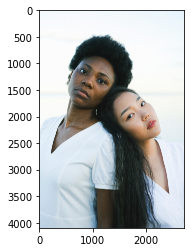

Found 1 face(s) in this photograph.
A face is located at pixel location Top: 958, Left: 514, Bottom: 1757, Right: 1313


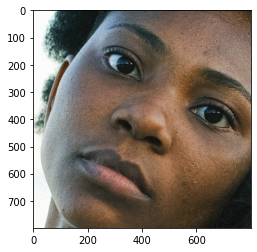

NameError: ignored

In [11]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  image = face_recognition.load_image_file(fn)

  plt.imshow(image)
  plt.show()  
  
  face_locations = face_recognition.face_locations(image)

  print("Found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()
    if detect(face_image):
      print( "               Female")
    else:
      print("                Male")